# Wildlife Observations and Conservation Status Analysis Across National Parks
*By [Sergio Avalos S.](https://github.com/srg2912)*

## 1. Introduction

Understanding the distribution and conservation status of wildlife across national parks is crucial for ecological research and conservation efforts. This report analyzes recent wildlife observations across various parks, focusing on the relationship between species classification and conservation risks.

### 1.1. Data

This project consists of 2 different datsets. **species_info.csv** contains information about each species and **observations.csv** contains the number of observations in the last week per specie alongside the park location where they were observed.

Both **observations.csv** and **species_info.csv** were provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is inspired by real data, but is **mostly fictional**.

### 1.2. Project Goals

1. **Summarize Observations by Park:** Calculate the total number of observations per park to identify which parks have the highest and lowest wildlife activity.  

2. **Analyze Conservation Status Distribution:** Determine how many species per category fall into each conservation status category to assess the overall biodiversity risk.  

3. **Identify risk of endanger:** Determine if certain types of species tend to be endangered more than others. 

4. **Find the Most and Least Observed Species:** Identify the species with the highest and lowest number of observations in the last week across all parks.  

5. **Compare Observations of Endangered vs. Non-Endangered Species:** Examine whether species with a special conservation status are observed more or less frequently than non-protected species.  

 


## 2. Data Preparation and Exploration

### 2.1. Importing the Modules

First, we need to import the necessary Python modules to work with.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import colormaps as cm
from matplotlib import pyplot as plt
import seaborn as sns

### 2.2. Loading the Datasets

#### Loading **observations**

Here, we will save the contents of **observations.csv** into the **observations** DataFrame.

In [2]:
observations = pd.read_csv('observations.csv')
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


We can observe that the DataFrame presents the following columns:

 - **scientific_name:** Scientific name of the species.

 - **park_name:** The park where the species was seen.
 
 - **observations:** The number of times the species was seen.

#### Loading **species_info**

Here, we will save the contents of **species_info.csv** into the **species_info** DataFrame.

In [3]:
species_info = pd.read_csv('species_info.csv')
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


We can observe that the DataFrame presents the following columns:

 - **category:** The taxonomical category of the species.

 - **scientific_name:** Scientific name of the species.

 - **common_names:** Common name of the species.
 
 - **observations:** The conservation status of the species.

### 2.3. Exploring the data

#### General Information about the DataFrames

With the method **.info()** we can get information about our DataFrames.

In [4]:
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


We can observe that **observations** presents 3 columns and 23296 rows without any null values.

In [5]:
print(species_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


We can observe that **species_info** presents 4 columns and 5824 rows, the column **conservations_status** presents 5633 null values, the rest of the columns present no null values. 

#### Handling Missing Data

In order to inspect the null values of **conservation_status** and to assess that there are no other types of missing data, we will display the summary statistics of both DataFrames.

In [6]:
print(observations.describe(include='all'))
print(observations.park_name.unique())

         scientific_name                            park_name  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.890532
min                  NaN                                  NaN      9.000000
25%                  NaN                                  NaN     86.000000
50%                  NaN                                  NaN    124.000000
75%                  NaN                                  NaN    195.000000
max                  NaN                                  NaN    321.000000
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' '

From the DataFrame **observations**:

 - In the column **scientific_name** the number of unique values doesn't coincide with the total amount of names, this is because names tend to appear more than once in the DataFrame, being **Myotis lucifugus** the most repeated, appearing a total of 12 times.

 - In the column **park_name** we can observe that there are 4 different parks in total. The one that appears the most is the **Great Smoky Mountains National Park** a total of 5824 times.

 - In the column **observations** we don't see any particular problems, the species that was seen the most in a specific park was seen a total of 321 and the species that was seen the less was seen a total of 9 times.

In [7]:
print(species_info.describe(include='all'))
print(species_info.category.unique())
print(species_info.conservation_status.unique())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


From the DataFrame **species_info**:

 - In the column **category** we don't see any missing values, there are 7 different values and the one that appears the most is **Vascular Plant**.
 
 - In the column **scientific_name**, again, the number of unique values doesn't match the number of total values, because the values tend to appear more than once in the DataFrame.

 - In the column **common_names** we reach the same conclusion as in **scientiic_names**.

 - In the column **conservation_status** we can observe that there are 4 different types of status, given that the null values form the vast majority of this section, we can safely assume that the null values represent not endangared species, therefore we can fill those missing values with **Not Endangered**.

In [8]:
species_info = species_info.fillna(value={'conservation_status': 'Not Endangered'})

## 3. Analysis

### 3.1. Summarizing Observations by Park

#### Methods

To calculate the total amount of observations per park, we will use the following methods:

 - **.groupby()**: We will use the **.groupby()** method on the column **park_name** to generate a new DataFrame that contains the 4 parks we will be analyzing, alongside the method **.sum()** on the column **observations** we will obtain the total number of observations per park.

 - **Bar plot**: to better visualize the data generated by the previous method. 

#### Analysis

In [9]:
observations_per_park = observations.groupby('park_name').observations.sum().reset_index()
print(observations_per_park)

                             park_name  observations
0                  Bryce National Park        576025
1  Great Smoky Mountains National Park        431820
2            Yellowstone National Park       1443562
3               Yosemite National Park        863332


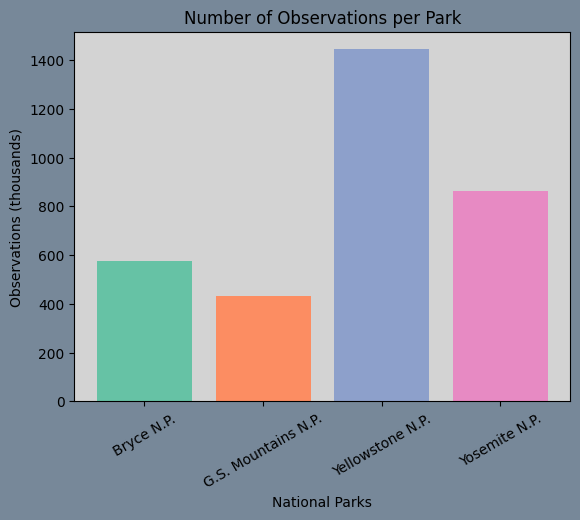

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(facecolor='lightslategray')
fig = plt.subplot()
fig.set_facecolor('lightgray')

plt.bar(observations_per_park.park_name, observations_per_park.observations, color=plt.cm.Set2(np.arange(len(observations_per_park.park_name))))

ax_x = plt.subplot()
ax_x.set_xticks([0, 1, 2, 3])
ax_x.set_xticklabels(['Bryce N.P.', 'G.S. Mountains N.P.', 'Yellowstone N.P.', 'Yosemite N.P.'], rotation=30)

ax_y = plt.subplot()
ax_y.set_yticks([i for i in range(0, 1500000, 200000)])
ax_y.set_yticklabels([i for i in range(0, 1500, 200)])

plt.xlabel('National Parks')
plt.ylabel('Observations (thousands)')
plt.title('Number of Observations per Park')

plt.show()
plt.clf()

#### Conclusion

The **Yellowstone National Park** is the park with highest amount of observations with over 1.4 million observations in the last week. The **Great Smoky Mountains National Park** is the park with the least amount of observations, with over 431 thousands of observations.

### 3.2. Analyzing Conservations Status Distribtuion

#### Methods

To determine how many species per category fall into each conservation status category we will use the following methods:

 - **.apply()**: This method, alongside a **lambda** function will allow us to separate the endangered species from those that aren't endangered.

 - **.groupby()**: This method will allow us to create a new DataFrame that contains the columns **category**, **conservation_status** and **count** from the previously filtered DataFrame.

 - **.pivot()**: This method allows us to create a better formated table from the previous one.

 - **Stacked Bar Plot**: For a better understanding of our data.

#### Analysis

In [11]:
species_info['endangered'] = species_info.apply(lambda row: False if row['conservation_status'] == 'Not Endangered' else True, axis=1)

In [12]:
status_per_specie = species_info[species_info.endangered == True].groupby(['category', 'conservation_status']).scientific_name.count().reset_index()
status_per_specie.rename(columns={'scientific_name': 'count'}, inplace=True)

In [13]:
pivot_df = status_per_specie.pivot(index="category", columns="conservation_status", values="count").fillna(0)
print(pivot_df)

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                   1.0          0.0                 4.0         2.0
Bird                        4.0          3.0                72.0         0.0
Fish                        3.0          0.0                 4.0         4.0
Mammal                      7.0          1.0                28.0         2.0
Nonvascular Plant           0.0          0.0                 5.0         0.0
Reptile                     0.0          0.0                 5.0         0.0
Vascular Plant              1.0          0.0                43.0         2.0


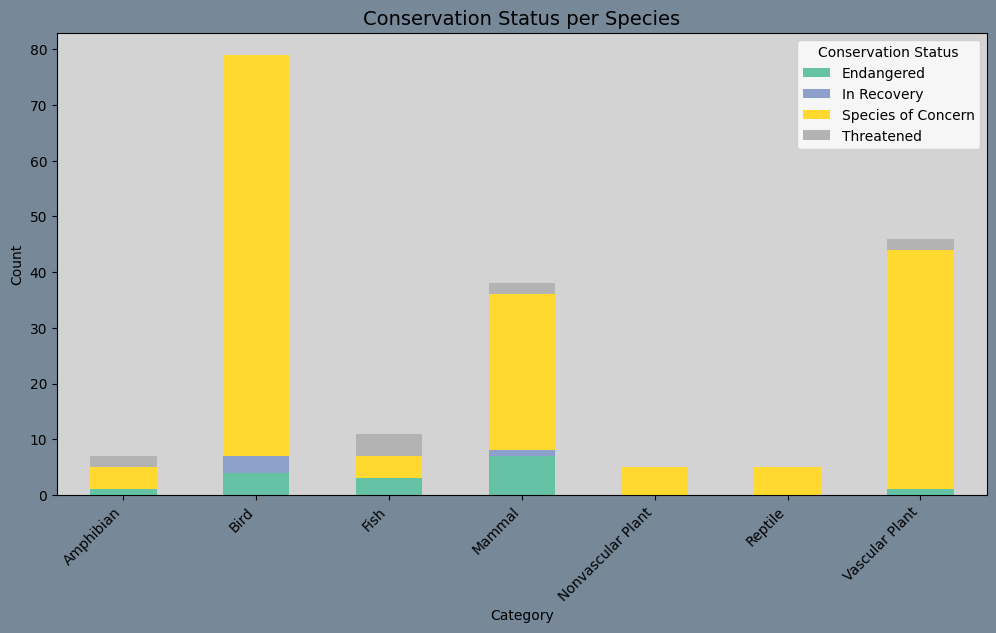

<Figure size 640x480 with 0 Axes>

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('lightslategray')
ax.set_facecolor('lightgray') 

pivot_df.plot(kind="bar", stacked=True, ax=ax, colormap="Set2")

ax.set_xlabel("Category")
ax.set_ylabel("Count")
ax.set_title("Conservation Status per Species", fontsize=14)
ax.legend(title="Conservation Status")
plt.xticks(rotation=45, ha="right")

plt.show()
plt.clf()

#### Conclusion

We can conclude that most of the endangered species fall under the status **species of concern**, while other status represent a minority. **Bird** is the category with the most endangered species, followed by **Vascular Plant** and **Mammal** in that specific order.

### 3.3. Identifying Risk of Endanger

#### Methods

To determine if certain types of species tend to be endangered more than others the following methods will be used:

 - **.groupby()** and **.pivot()**: In order to get a new organized dataframe that counts the endangered and not endangered species by category.

 - **Chi-squared test**: In order to test if the null hypothesis. (There is no association between taxonomic category and the likelihood of being endangered)

 - **Standarized residuals**: In order to meassure the level of risk of getting endangered.

 - **Heatmap**: In order to have a better comprehension of the standarized residuals.

#### Analysis

In [15]:
category_counts = species_info.groupby(['category', 'endangered']).scientific_name.nunique().reset_index()
category_counts = category_counts.pivot(columns='endangered', index='category', values='scientific_name')
category_counts = category_counts.rename(columns={False: "Not Endangered", True: "Endangered"})

print(category_counts)

endangered         Not Endangered  Endangered
category                                     
Amphibian                      72           7
Bird                          413          75
Fish                          115          11
Mammal                        146          30
Nonvascular Plant             328           5
Reptile                        73           5
Vascular Plant               4216          46


In [16]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(category_counts)

print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)


Chi-squared Statistic: 426.5293
P-value: 0.0000
Degrees of Freedom: 6
Expected Frequencies:
 [[7.64483941e+01 2.55160592e+00]
 [4.72238181e+02 1.57618188e+01]
 [1.21930350e+02 4.06964995e+00]
 [1.70315410e+02 5.68459040e+00]
 [3.22244497e+02 1.07555034e+01]
 [7.54806929e+01 2.51930711e+00]
 [4.12434248e+03 1.37657524e+02]]


In [17]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Some categories are more at risk than others.")
else:
    print("Fail to reject the null hypothesis: No significant difference in risk across categories.")

Reject the null hypothesis: Some categories are more at risk than others.


In [18]:
residuals = (category_counts - expected) / np.sqrt(expected)

print("Standardized Residuals:\n", residuals.Endangered)

Standardized Residuals:
 category
Amphibian             2.784816
Bird                 14.921021
Fish                  3.435395
Mammal               10.198399
Nonvascular Plant    -1.754963
Reptile               1.562905
Vascular Plant       -7.812106
Name: Endangered, dtype: float64


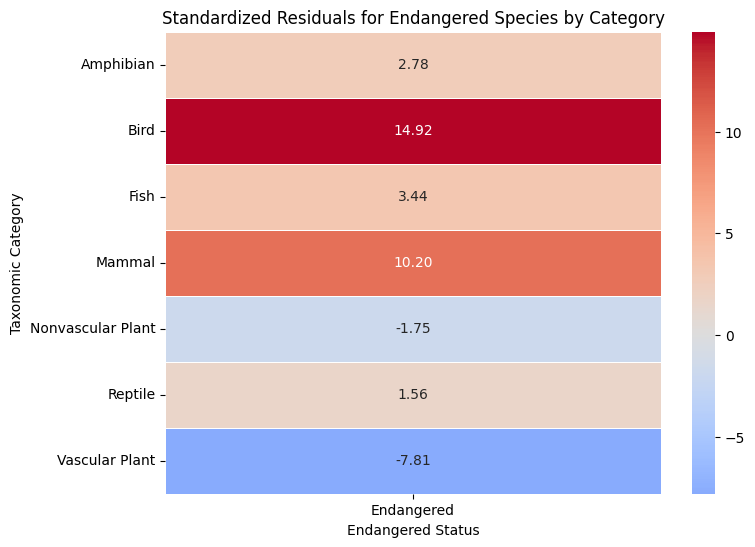

<Figure size 640x480 with 0 Axes>

In [19]:
residuals_endangered = residuals.Endangered

residuals_df = residuals_endangered.to_frame()

plt.figure(figsize=(8, 6))
sns.heatmap(residuals_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")

plt.title("Standardized Residuals for Endangered Species by Category")
plt.xlabel("Endangered Status")
plt.ylabel("Taxonomic Category")

plt.show()
plt.clf()

#### Conclusion

In our analysis we got a **p-value** of nearly 0, thereby we must reject the null hypothesis, meaning that the hypothesis that there is an association between taxonomic category and the likelihood of being endangered is most likely true. In our **heat map** we can observe that the species that have a higher risk of being endangered are birds and mammals, while species like vascular plants and nonvascular plants present lower risk. 

### 3.4. Finding the Most and Least Observed Species

#### Methods

In order to identify the species with the highest and lowest number of observations in the last week the following methods will be used:

 - **.merge()**: In order to get a dataset that contains the data of the DataFrames **species_info** and **observations**. This new DataFrame will be usefull for this and the following analysis.

 - **.groupby()**: In order to get a sub-set of the data we will need (number of observations and taxonomical categories) for this specific analysis.

 - **Bar Plot**: For a better understanding of our findings.

#### Analysis

In [20]:
name_observations = observations.groupby('scientific_name').observations.sum().reset_index()
unique_names = species_info.drop_duplicates(subset=['scientific_name'])
info_observations = pd.merge(name_observations, unique_names)
print(info_observations.head())

        scientific_name  observations           category  \
0         Abies bifolia           532     Vascular Plant   
1        Abies concolor           630     Vascular Plant   
2         Abies fraseri           518     Vascular Plant   
3  Abietinella abietina           592  Nonvascular Plant   
4     Abronia ammophila           523     Vascular Plant   

                                        common_names conservation_status  \
0                          Rocky Mountain Alpine Fir      Not Endangered   
1  Balsam Fir, Colorado Fir, Concolor Fir, Silver...      Not Endangered   
2                                         Fraser Fir  Species of Concern   
3                                   Abietinella Moss      Not Endangered   
4     Wyoming Sand Verbena, Yellowstone Sand Verbena  Species of Concern   

   endangered  
0       False  
1       False  
2        True  
3       False  
4        True  


In [21]:
category_observations = info_observations.groupby('category').observations.sum().reset_index()
print(category_observations)

            category  observations
0          Amphibian         43971
1               Bird        292833
2               Fish         70818
3             Mammal        116696
4  Nonvascular Plant        190653
5            Reptile         44678
6     Vascular Plant       2555090


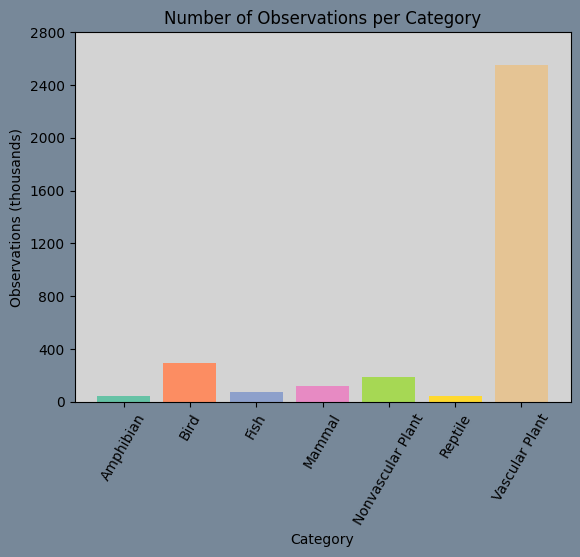

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(facecolor='lightslategray')
fig = plt.subplot()
fig.set_facecolor('lightgray')

plt.bar(category_observations.category, category_observations.observations, color=plt.cm.Set2(np.arange(len(category_observations.category))))

ax_x = plt.subplot()
ax_x.set_xticks(range(7))
ax_x.set_xticklabels(category_observations.category, rotation=60)

ax_y = plt.subplot()
ax_y.set_yticks([i for i in range(0, 2900000, 400000)])
ax_y.set_yticklabels([i for i in range(0, 2900, 400)])

plt.xlabel('Category')
plt.ylabel('Observations (thousands)')
plt.title('Number of Observations per Category')

plt.show()
plt.clf()

#### Conclusion

The most observed category is **vascular plants** with an outstanding value of 2.5 million times observed, a value significantly higher than the average of other categories. In the other hand, the least observed category is **amphibian**, observed a total of 44.6 thousand times.

### 3.5. Comparing Observations of Endangered vs. Non-Endangered Species

#### Methods

To determine wether species with a special conservation status are observed more or less frequently than non-protected species.   the following methods will be used:

 - **.groupby()**: In order to get a sub-set of the data we will need (number of observations and endangered) for this specific analysis.

 - **Chi-squared test**: In order to test if the null hypothesis. (There is no association between the endangered status and the likelihood of observing the species)

 - **Bar Plot**: For a better understanding of our findings.

#### Analysis

In [23]:
observations_endangered = info_observations.groupby('endangered').observations.sum()
print(observations_endangered)

endangered
False    3225444
True       89295
Name: observations, dtype: int64


In [24]:
obs_endangered = observations_endangered[True]
obs_non_endangered = observations_endangered[False]

total_count = obs_endangered + obs_non_endangered
expected_endangered = total_count / 2
expected_non_endangered = total_count / 2

chi2_stat, p_value = stats.chisquare([obs_endangered, obs_non_endangered], f_exp=[expected_endangered, expected_non_endangered])

print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Endangered species are observed at a different rate than non-endangered ones.")
else:
    print("Fail to reject the null hypothesis: Endangered and non-endangered species are observed at similar rates.")


Chi-squared Statistic: 2967180.9908
P-value: 0.0000
Reject the null hypothesis: Endangered species are observed at a different rate than non-endangered ones.


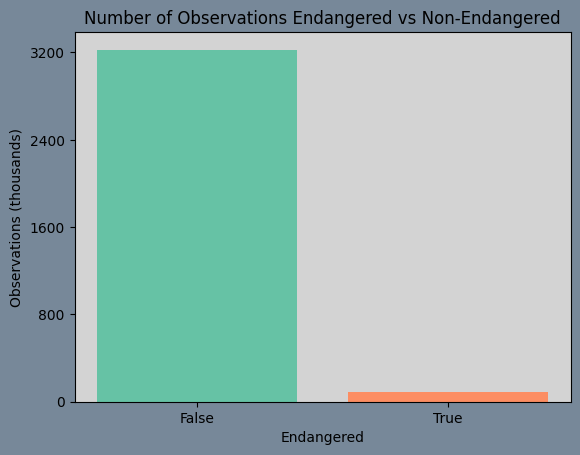

<Figure size 640x480 with 0 Axes>

In [25]:
observations_endangered = observations_endangered.reset_index()

plt.figure(facecolor='lightslategray')
fig = plt.subplot()
fig.set_facecolor('lightgray')

plt.bar(observations_endangered.endangered, observations_endangered.observations, color=plt.cm.Set2(np.arange(len(observations_endangered.endangered))))

ax_x = plt.subplot()
ax_x.set_xticks(range(2))
ax_x.set_xticklabels(observations_endangered.endangered)

ax_y = plt.subplot()
ax_y.set_yticks([i for i in range(0, 3300000, 800000)])
ax_y.set_yticklabels([i for i in range(0, 3300, 800)])

plt.xlabel('Endangered')
plt.ylabel('Observations (thousands)')
plt.title('Number of Observations Endangered vs Non-Endangered')

plt.show()
plt.clf()

#### Conclusion

With a **p-value** of 0 we must reject the null hypothesis, meaning that the hypothesis of endangered species are less observed is likely to be true. This observation is also supported by our **bar chart**, in which we can clearly see that there were way more observations of not-endangered species than endangered ones.

## 4. Conclusions 

Our analysis reveals several key findings regarding wildlife observations and species conservation status:

 - **Wildlife Activity by Park**: Yellowstone National Park reported the highest number of observations (over 1.4 million), whereas the Great Smoky Mountains National Park had the lowest (approximately 431,000).

 - **Conservation Status Distribution**: The majority of endangered species fall under the species of concern category, with birds, vascular plants, and mammals being the most affected groups.

 - **Endangerment Risk by Category**: A chi-squared test confirmed a significant association between taxonomic category and the likelihood of being endangered (p-value ≈ 0). Birds and mammals exhibit the highest risk, as visualized in our heatmap.

 - **Most and Least Observed Species**: Vascular plants were observed the most (2.5 million times), whereas amphibians had the lowest observation count (44,600).
 
 - **Observations of Endangered vs. Non-Endangered Species**: A statistical test rejected the hypothesis that endangered species are observed at equal rates as non-endangered ones (p-value = 0). Our bar chart clearly illustrates that non-endangered species are observed significantly more often.

These insights emphasize the importance of continued monitoring efforts, particularly for species at greater risk of endangerment. Further research could explore potential factors influencing observation rates, such as habitat accessibility, species behavior, and park policies.

